# Poredjenje modela

In [1]:
# Importing the training and testing sets from the KNN file
import pickle

# Load the data from the file
with open('data.pkl', 'rb') as f:
    X_train, X_test, Y_train, Y_test = pickle.load(f)

In [2]:
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [3]:
# GridSearchCV KNN model
params = {'criterion': ['gini', 'entropy'], 
          'max_depth': [2, 4, 6, 8]
         }

params_grid = {'n_neighbors': range(10, 50, 5),
               'weights': ['uniform', 'distance'],
                'p': [1, 2]}

knnCV = GridSearchCV(KNeighborsClassifier(), params_grid, cv=6, verbose=4)

In [4]:
# KNN ne-optimizovani model

from math import radians, sin, cos, sqrt, atan2
def haversine_distance(coord1, coord2):
    lat1, lon1 = coord1
    lat2, lon2 = coord2
    R = 6371  # Prosečni poluprečnik Zemlje u kilometrima
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat / 2)**2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance

def custom_distance(x, y):
    euc_distance = np.sqrt(np.sum((x[:2] - y[:2])**2))  # Euklidska udaljenost za prva četiri atributa
    haversine_dist = haversine_distance((x[2], x[3]), (y[2], y[3]))  # Haversine udaljenost za longitude i latitude
    total_distance = np.sqrt(euc_distance**2 + haversine_dist**2)
    return total_distance

knn =  KNeighborsClassifier(metric=custom_distance)


In [5]:
# GridSearchCV DTC model
from sklearn.model_selection import GridSearchCV
params =  {
    'criterion': ['gini', 'entropy'],
    'max_depth': [x for x in range(3, 30)],
    'max_features': [x for x in range(3, 40)]
}

dtc = GridSearchCV(DecisionTreeClassifier(), param_grid= params)

In [6]:
# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=41)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [9]:
models = [knnCV,knn, dtc, rfc]
model_names = ["KNN with GridSearchCV", "KNN non-optimized","DTC with GridSearchCV", "RandomForestClassifier"]
colors = ["green", "blue", "red", "purple"]

# Cheap/Affordable

Fitting 6 folds for each of 32 candidates, totalling 192 fits
[CV 1/6] END n_neighbors=10, p=1, weights=uniform;, score=0.811 total time=   0.1s
[CV 2/6] END n_neighbors=10, p=1, weights=uniform;, score=0.811 total time=   0.1s
[CV 3/6] END n_neighbors=10, p=1, weights=uniform;, score=0.815 total time=   0.1s
[CV 4/6] END n_neighbors=10, p=1, weights=uniform;, score=0.822 total time=   0.1s
[CV 5/6] END n_neighbors=10, p=1, weights=uniform;, score=0.812 total time=   0.1s
[CV 6/6] END n_neighbors=10, p=1, weights=uniform;, score=0.815 total time=   0.1s
[CV 1/6] END n_neighbors=10, p=1, weights=distance;, score=0.817 total time=   0.0s
[CV 2/6] END n_neighbors=10, p=1, weights=distance;, score=0.818 total time=   0.0s
[CV 3/6] END n_neighbors=10, p=1, weights=distance;, score=0.832 total time=   0.0s
[CV 4/6] END n_neighbors=10, p=1, weights=distance;, score=0.822 total time=   0.0s
[CV 5/6] END n_neighbors=10, p=1, weights=distance;, score=0.819 total time=   0.0s
[CV 6/6] END n_neigh

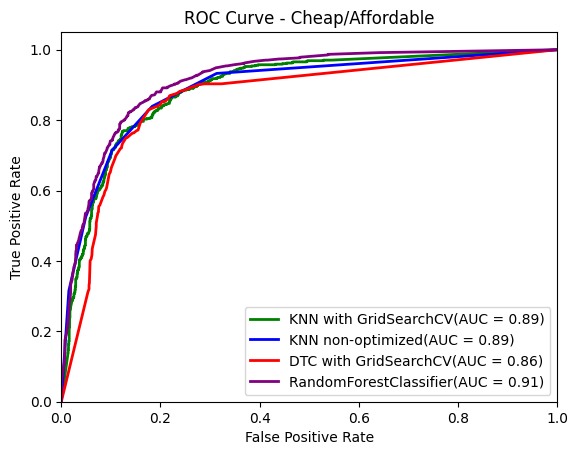

In [10]:
# Pozitivna klasa
pos_class = "Cheap/Affordable" 

# Spoj preostalih je negativna klasa
neg_class = ["Medium priced", "Expensive"]

# Konvertovanje u binaran format
y_train_bin = (Y_train == pos_class).astype(int)
y_test_bin = (Y_test == pos_class).astype(int)

plt.figure()
for model, model_name, color in zip(models, model_names, colors):
    model.fit(X_train, y_train_bin)
    y_pred = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test_bin, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2, label= model_name +'(AUC = %0.2f)' % roc_auc)
    

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Cheap/Affordable')
plt.legend(loc="lower right")
plt.show()

Fitting 6 folds for each of 32 candidates, totalling 192 fits
[CV 1/6] END n_neighbors=10, p=1, weights=uniform;, score=0.692 total time=   0.1s
[CV 2/6] END n_neighbors=10, p=1, weights=uniform;, score=0.696 total time=   0.1s
[CV 3/6] END n_neighbors=10, p=1, weights=uniform;, score=0.697 total time=   0.1s
[CV 4/6] END n_neighbors=10, p=1, weights=uniform;, score=0.710 total time=   0.1s
[CV 5/6] END n_neighbors=10, p=1, weights=uniform;, score=0.695 total time=   0.1s
[CV 6/6] END n_neighbors=10, p=1, weights=uniform;, score=0.714 total time=   0.1s
[CV 1/6] END n_neighbors=10, p=1, weights=distance;, score=0.700 total time=   0.0s
[CV 2/6] END n_neighbors=10, p=1, weights=distance;, score=0.700 total time=   0.0s
[CV 3/6] END n_neighbors=10, p=1, weights=distance;, score=0.709 total time=   0.0s
[CV 4/6] END n_neighbors=10, p=1, weights=distance;, score=0.708 total time=   0.0s
[CV 5/6] END n_neighbors=10, p=1, weights=distance;, score=0.694 total time=   0.0s
[CV 6/6] END n_neigh

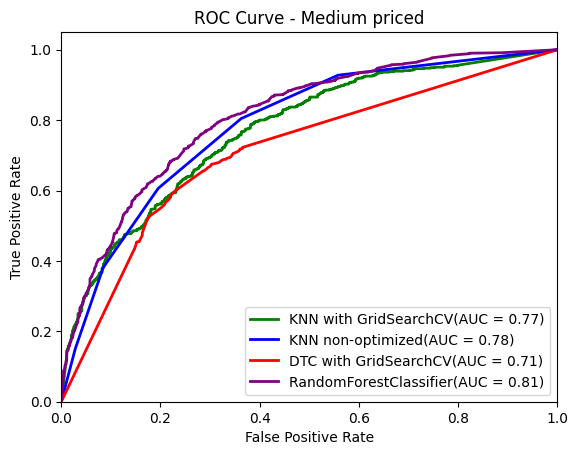

In [11]:
# Pozitivna klasa
pos_class = "Medium priced" 
# Spoj preostale dve
neg_class = ["Cheap/Affordable", "Expensive"] 

# Konvertovanje u binaran format
y_train_bin = (Y_train == pos_class).astype(int)
y_test_bin = (Y_test == pos_class).astype(int)

plt.figure()
for model, model_name, color in zip(models, model_names, colors):
    model.fit(X_train, y_train_bin)
    y_pred = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test_bin, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2, label= model_name +'(AUC = %0.2f)' % roc_auc)
    

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Medium priced')
plt.legend(loc="lower right")
plt.show()

Fitting 6 folds for each of 32 candidates, totalling 192 fits
[CV 1/6] END n_neighbors=10, p=1, weights=uniform;, score=0.823 total time=   0.1s
[CV 2/6] END n_neighbors=10, p=1, weights=uniform;, score=0.824 total time=   0.1s
[CV 3/6] END n_neighbors=10, p=1, weights=uniform;, score=0.824 total time=   0.1s
[CV 4/6] END n_neighbors=10, p=1, weights=uniform;, score=0.817 total time=   0.1s
[CV 5/6] END n_neighbors=10, p=1, weights=uniform;, score=0.816 total time=   0.1s
[CV 6/6] END n_neighbors=10, p=1, weights=uniform;, score=0.833 total time=   0.1s
[CV 1/6] END n_neighbors=10, p=1, weights=distance;, score=0.825 total time=   0.0s
[CV 2/6] END n_neighbors=10, p=1, weights=distance;, score=0.816 total time=   0.0s
[CV 3/6] END n_neighbors=10, p=1, weights=distance;, score=0.829 total time=   0.0s
[CV 4/6] END n_neighbors=10, p=1, weights=distance;, score=0.820 total time=   0.0s
[CV 5/6] END n_neighbors=10, p=1, weights=distance;, score=0.823 total time=   0.0s
[CV 6/6] END n_neigh

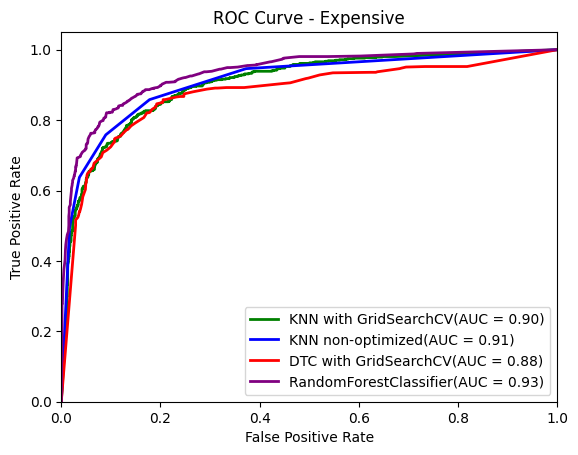

In [12]:
# Pozitivna klasa
pos_class = "Expensive" 
# Spoj preostale dve
neg_class = ["Medium priced", "Cheap/Affordable"] 

# Kovnertovanje u binaran format
y_train_bin = (Y_train == pos_class).astype(int)
y_test_bin = (Y_test == pos_class).astype(int)

plt.figure()
for model, model_name, color in zip(models, model_names, colors):
    model.fit(X_train, y_train_bin)
    y_pred = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test_bin, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2, label= model_name +'(AUC = %0.2f)' % roc_auc)
    

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Expensive')
plt.legend(loc="lower right")
plt.show()